# **Detecção de outlier**
* ### Pode ser usado como preprocessamento de dados ou para machine Learning 
* ### É um metodo analitico
----
### E sistem tres tipos de outlier 
* ###  **outliers pontuais:** observações diferentes do conjunto de dados total 
* ###  **outliers de contexto:** observações anormais em um contexto especifico
* ###  **outliers coletivo:** Quando temos um conjuto de anormalidade em um amesmo DF
----
### **Metodos para detectar outliers**
* ###  **Analise de valores estremos com o metodo Tukey**
* ###  **Analise multi variavel com boxplot e matrizes de scatterplot**
* ###  **Machinelearning - clusterização especial baseada em densidade de aplicações com ruidos (PCA)**

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 7.5 , 6

df_iris = pd.read_csv("Iris")


In [2]:
iris = datasets.load_iris()
x = iris.data
name_columns = iris.feature_names
dfiris = pd.DataFrame(x, columns=name_columns)

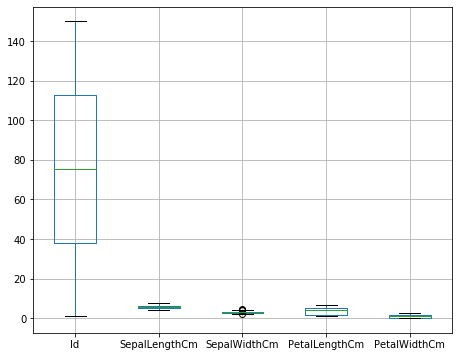

In [3]:
df_iris.boxplot()

### Forma visual de se indentificar outliers com boxplot

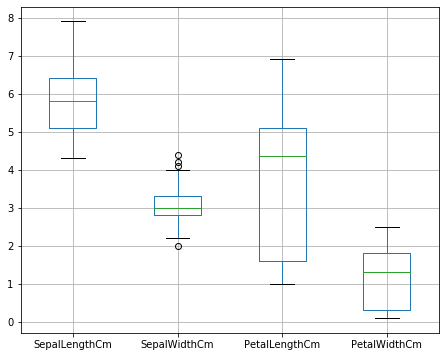

In [4]:
df_iris = df_iris.drop(columns='Id')
df_iris.boxplot()

### Pode mso ver que as variavel  sepalWidthCm tem alguns outliers 

In [5]:
df_sepal = df_iris['SepalWidthCm']
sepal_outlier = df_sepal > 4
df_iris[sepal_outlier]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [6]:
sepal_outlier = df_sepal < 2.05
df_iris[sepal_outlier]



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [10]:
#.loc[[15, 32, 33, 60], 'SepalWidthCm']

In [13]:
# explindo outlier
#df_iris.loc[[15, 32, 33, 60], '']
#vai = df_iris[df_iris['SepalWidthCm'].drop([4.1,4.2])]
df_iris.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


## fazendo o boxplot com o sns, assim podemos compara duas variaveis e ver quais os outliers que aparece

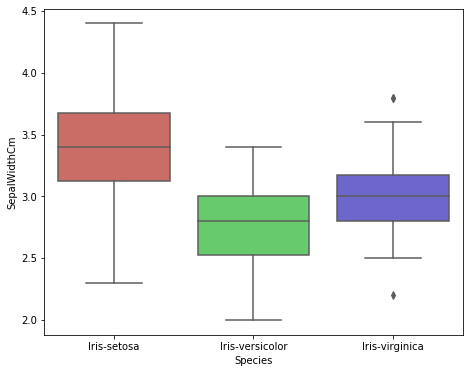

In [17]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df_iris, palette='hls')

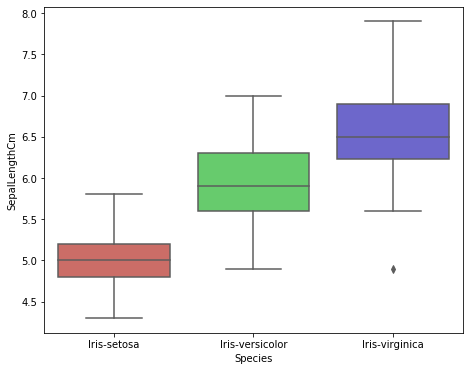

In [19]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df_iris, palette='hls')

### podemos ver que temos outliers na especie virginica tanto para a largura da sepala tanto para a altura dela
 
 ----
 
#### agora vamos ver a matriz de scatterplots

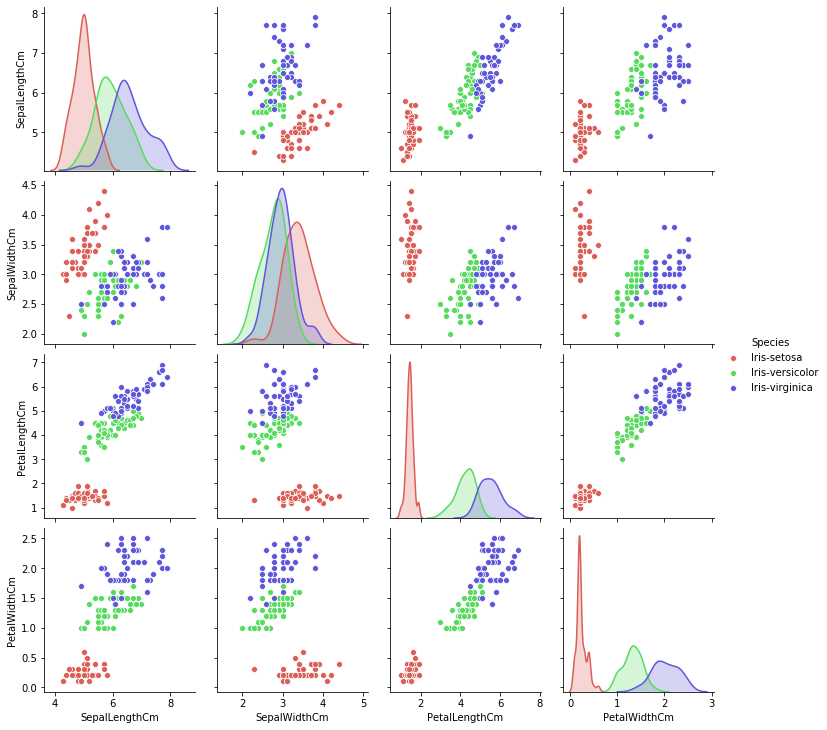

In [20]:
sns.pairplot(df_iris, hue='Species', palette='hls')

### atente se aos pontos nao relacionados eles podem ser um outlier

 ---
# Usando o DBSCan para detecção de outliers

In [21]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [34]:
modelo = DBSCAN(eps=0.5, min_samples=5)

In [35]:
dados = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
modelo.fit(dados)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [36]:
Counter(modelo.labels_)

Counter({0: 49, -1: 17, 1: 84})